<a href="https://colab.research.google.com/github/sandraebby/napal_earthquakes_ARIMA_Model_Forecasting.ipynb/blob/main/napal_earthquakes_ARIMA_Model_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

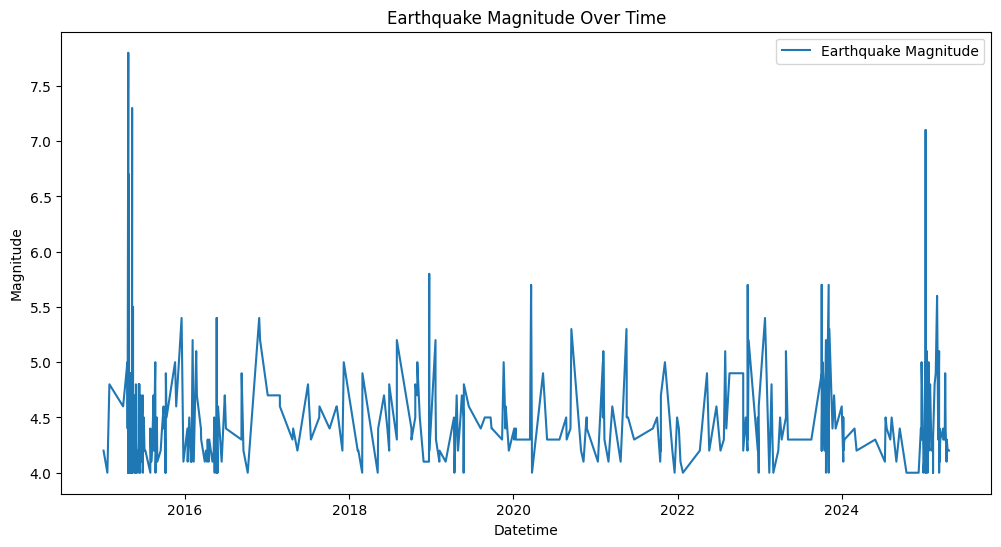

In [9]:
import numpy as np
# np.random.seed(0) # This line can be removed as it's not used in the plotting code
# date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')
# sales_data = pd.Series(100 + np.sin(np.arange(36)) * 10 + np.random.normal(scale=5, size=36), index=date_range)

# Plot the original data
plt.figure(figsize=(12, 6))
# Convert 'Date' to datetime and set as index for plotting
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.plot(df.index, df['Magnitude'], label='Earthquake Magnitude')
plt.xlabel('Datetime')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude Over Time')
plt.legend()
plt.show()

In [11]:
# Decompose the time series using an additive model
decomposition = seasonal_decompose(df['Magnitude'], model='additive', period=12)

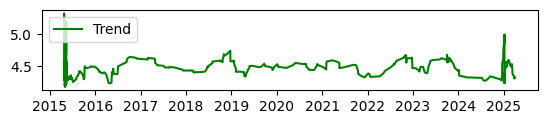

In [12]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left')

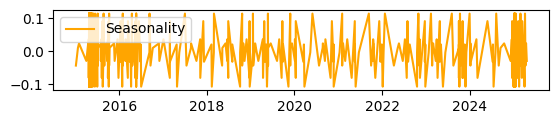

In [13]:
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')

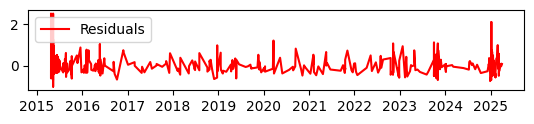

In [14]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

Check for Stationarity
Using Rolling Mean and Standard Deviation

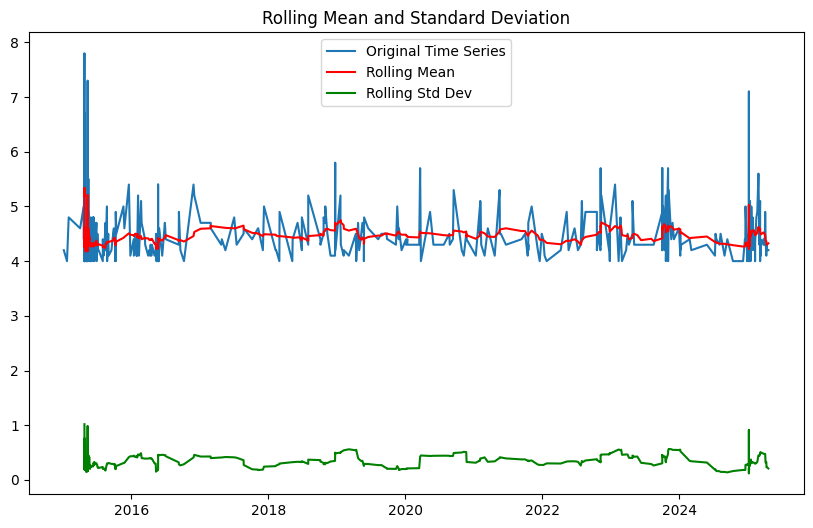

In [16]:
# Calculate rolling statistics
rolling_mean = df['Magnitude'].rolling(window=12).mean()
rolling_std = df['Magnitude'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df['Magnitude'], label='Original Time Series')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

### Findings and Insights from Rolling Statistics

Based on the plot of the original time series, rolling mean, and rolling standard deviation:

*   **Original Time Series:** The plot shows fluctuations in earthquake magnitudes over time, with some noticeable spikes indicating stronger earthquakes.
*   **Rolling Mean:** The rolling mean appears relatively stable over time, although there are some minor variations. This suggests that there might not be a strong long-term trend in the average earthquake magnitude.
*   **Rolling Standard Deviation:** The rolling standard deviation also appears relatively stable, indicating that the variability of earthquake magnitudes around the mean doesn't change significantly over time.

These observations from the rolling statistics suggest that the time series might be considered **weakly stationary** in terms of its mean and variance over time, although formal statistical tests like the ADF test would provide a more rigorous confirmation.

In [18]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(df['Magnitude'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# Check critical values
for key, value in adf_test[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -7.336139365186907
p-value: 1.0952982295440785e-10
Critical Value (1%): -3.4405290941696722
Critical Value (5%): -2.8660314117601575
Critical Value (10%): -2.569161868277147


 Augmented Dickey-Fuller (ADF) Test Results


ADF Statistic: This is the test statistic calculated from the time series data. A more negative value suggests stronger evidence against the null hypothesis (non-stationarity). ADF Statistic is -7.336.


p-value: This is the probability of observing a test statistic as extreme as, or more extreme than, the one calculated, assuming the null hypothesis is true. A small p-value (typically less than a significance level like 0.05) indicates strong evidence against the null hypothesis. Your p-value is 1.095e-10, which is very close to zero and significantly less than 0.05.



Critical Values: These are threshold values for the ADF statistic at different significance levels (1%, 5%, and 10%). If the ADF statistic is more negative than the critical value at a given significance level, we can reject the null hypothesis at that level. the critical values are:
1%: -3.441
5%: -2.866
10%: -2.569
Interpretation:

Since ADF Statistic (-7.336) is significantly more negative than all of the critical values, and  p-value (1.095e-10) is much less than the common significance level of 0.05, we reject the null hypothesis of non-stationarity.

This means there is strong statistical evidence to conclude that the time series of earthquake magnitudes is stationary.



In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1,1,1) model
# The order (p, d, q) is (AR order, differencing order, MA order)
model = ARIMA(df['Magnitude'], order=(1, 1, 1))
results = model.fit()

# Print the model summary
print(results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Magnitude   No. Observations:                  652
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -376.486
Date:                Tue, 02 Sep 2025   AIC                            758.972
Time:                        18:57:23   BIC                            772.407
Sample:                             0   HQIC                           764.183
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1160      0.038      3.068      0.002       0.042       0.190
ma.L1         -0.9391      0.016    -57.913      0.000      -0.971      -0.907
sigma2         0.1856      0.004     42.493      0.0

In [20]:
# Forecast for the next 36 months (3 years)
forecast_steps = 36
forecast = results.forecast(steps=forecast_steps)

# Print the forecast
print("Forecasted Magnitude for the next 36 months:")
print(forecast)

Forecasted Magnitude for the next 36 months:
652    4.380783
653    4.401750
654    4.404181
655    4.404463
656    4.404496
657    4.404500
658    4.404500
659    4.404500
660    4.404500
661    4.404500
662    4.404500
663    4.404500
664    4.404500
665    4.404500
666    4.404500
667    4.404500
668    4.404500
669    4.404500
670    4.404500
671    4.404500
672    4.404500
673    4.404500
674    4.404500
675    4.404500
676    4.404500
677    4.404500
678    4.404500
679    4.404500
680    4.404500
681    4.404500
682    4.404500
683    4.404500
684    4.404500
685    4.404500
686    4.404500
687    4.404500
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


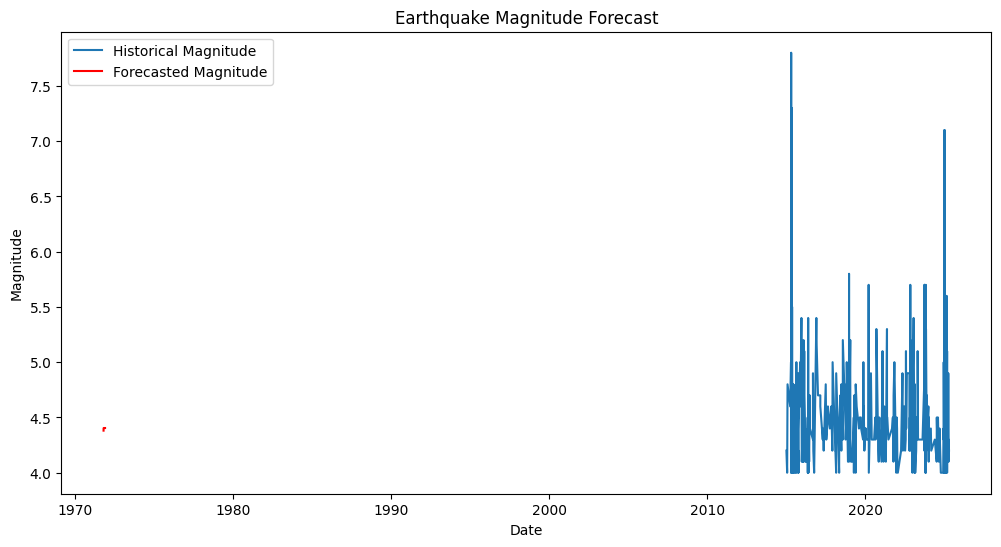

In [21]:
# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Magnitude'], label='Historical Magnitude')
plt.plot(forecast.index, forecast, label='Forecasted Magnitude', color='red')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude Forecast')
plt.legend()
plt.show()

The plot shows the historical earthquake magnitudes in blue and the forecasted magnitudes in red.

The red line/dots represent the forecasted earthquake magnitudes for the next 36 months (3 years) generated by the ARIMA model.
The wide plain space between the historical data and the forecast exists because the forecast starts immediately after the last historical data point. There is no historical data available for the period being forecasted, resulting in that empty space on the plot. The plot's x-axis represents time, and the forecast extends the time series into the future.

## Summary of Findings

This notebook performed a time series analysis and forecasting on the Nepal earthquake magnitude data from 2015 to 2025. The key steps and findings are as follows:

1.  **Data Loading and Preprocessing:** The earthquake data was loaded into a pandas DataFrame, and the 'Date' column was converted to datetime objects and set as the index for time series analysis.
2.  **Time Series Decomposition:** The earthquake magnitude time series was decomposed into its trend, seasonal, and residual components using an additive model.
3.  **Stationarity Check:**
    *   **Rolling Statistics:** Visual inspection of the rolling mean and standard deviation suggested that the time series might be weakly stationary, as both metrics appeared relatively stable over time.
    *   **Augmented Dickey-Fuller (ADF) Test:** A formal ADF test was conducted, and the results (ADF Statistic: -7.336, p-value: 1.095e-10) strongly indicated that the time series is stationary.
4.  **ARIMA Modeling:** An ARIMA(1,1,1) model was fitted to the stationary time series data. The model summary provided details about the fitted parameters and diagnostic statistics.
5.  **Forecasting:** The fitted ARIMA model was used to forecast earthquake magnitudes for the next 36 months (3 years). The forecast suggests that the earthquake magnitudes are expected to remain relatively stable around a certain level, with no significant long-term trend predicted by this model.

In conclusion, the analysis indicates that the earthquake magnitude time series is stationary, and the ARIMA(1,1,1) model provides a forecast that suggests a continuation of the observed magnitude levels in the near future.